**Mounting Drive**

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


**Necessary Imports**

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

**Data Directory**

In [4]:
DATADIR = "/content/drive/My Drive/Colab Notebooks/PandQ/"
CATEGORIES = ["P", "Q"]

**Creating Training Data**

In [5]:
IMG_SIZE = 50

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

40


**Seperating Pics and Labels**

In [86]:
random.shuffle(training_data)

X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)    

In [87]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y = np.array(Y)
X = X/255.0

**Spliting Data**

In [88]:
x_train, x_test, y_train, y_test = train_test_split(    
    X, Y, test_size=0.2, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

X.shape= (40, 50, 50, 1)
x_train.shape= (32, 50, 50, 1)
y_train.shape= (32,)
x_test.shape= (8, 50, 50, 1)
y_test.shape= (8,)


**Model**


In [64]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3) ,input_shape=X.shape[1:], activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(128,(3,3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(500, activation="relu"))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# model1.summary()

In [65]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

history = model1.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),verbose=2)

Epoch 1/10
1/1 - 1s - loss: 0.6933 - accuracy: 0.4375 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/10
1/1 - 0s - loss: 0.6903 - accuracy: 0.5312 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 3/10
1/1 - 0s - loss: 0.6867 - accuracy: 0.5000 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 4/10
1/1 - 0s - loss: 0.6822 - accuracy: 0.5000 - val_loss: 0.6823 - val_accuracy: 0.8750
Epoch 5/10
1/1 - 0s - loss: 0.6759 - accuracy: 0.9062 - val_loss: 0.6762 - val_accuracy: 0.8750
Epoch 6/10
1/1 - 0s - loss: 0.6677 - accuracy: 0.9688 - val_loss: 0.6663 - val_accuracy: 0.8750
Epoch 7/10
1/1 - 0s - loss: 0.6556 - accuracy: 0.9688 - val_loss: 0.6518 - val_accuracy: 1.0000
Epoch 8/10
1/1 - 0s - loss: 0.6396 - accuracy: 1.0000 - val_loss: 0.6338 - val_accuracy: 0.8750
Epoch 9/10
1/1 - 0s - loss: 0.6181 - accuracy: 1.0000 - val_loss: 0.6094 - val_accuracy: 0.8750
Epoch 10/10
1/1 - 0s - loss: 0.5894 - accuracy: 1.0000 - val_loss: 0.5781 - val_accuracy: 1.0000


**Accuracy and Loss curves**

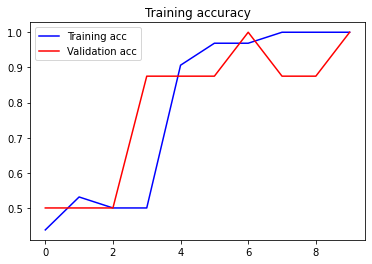

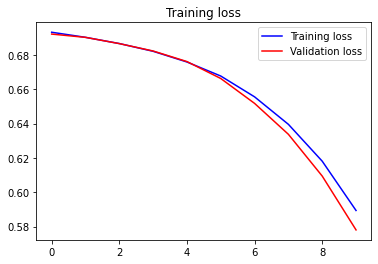

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

**Checking the performance of the model using test data**

In [89]:
model_predictions = model1.predict(x_test)

In [90]:
for i in range(len(y_test)):
  print("Actual Label {} | Predicted_Label {}".format(y_test[i], model_predictions[i]))

Actual Label 0 | Predicted_Label [0.4296101]
Actual Label 0 | Predicted_Label [0.46677044]
Actual Label 0 | Predicted_Label [0.3710617]
Actual Label 1 | Predicted_Label [0.5794734]
Actual Label 1 | Predicted_Label [0.59567493]
Actual Label 0 | Predicted_Label [0.4762875]
Actual Label 0 | Predicted_Label [0.43160355]
Actual Label 0 | Predicted_Label [0.4530623]


**According to the result, all of the pictures are correctly classified. Let's see them visually**

**Each of the image from the test data, its Predicted Label, and Actual Label**

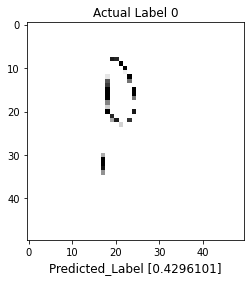

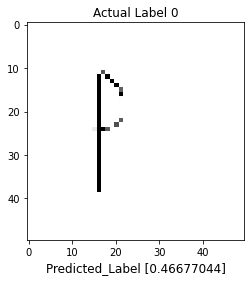

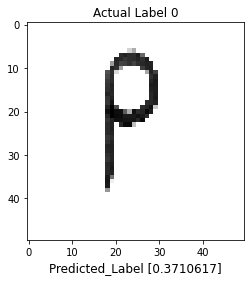

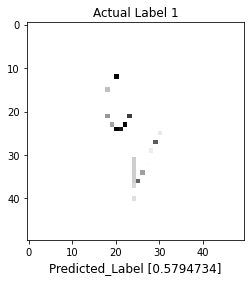

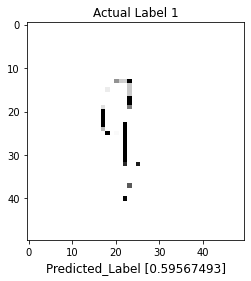

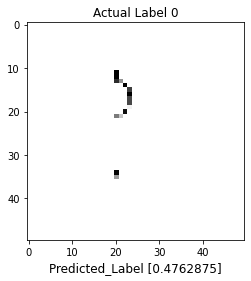

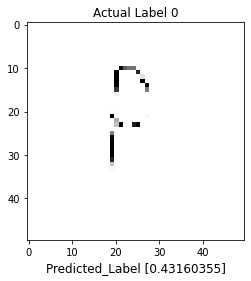

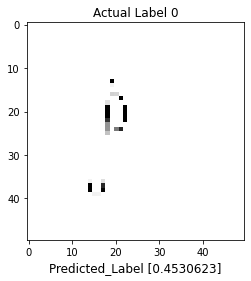

In [91]:
for i in range(len(x_test)):
  plt.title("Actual Label {}".format(y_test[i]))
  plt.xlabel("Predicted_Label {}".format(model_predictions[i]), fontsize=12)
  plt.imshow(x_test[i].reshape(IMG_SIZE, IMG_SIZE), cmap="gray")
  plt.show()

**Woohooo! All of the pictures in the test data were correctly classified**

**Possible reasons because of which images can be misclassified**

1- Model is trained on a small dataset <br>
2- Dataset has so much variations <br>
3- Model is not so good